In [1]:
import espresso_machine as esma

In [2]:
model = esma.project(project_id='Fe')

In [3]:
model.get_structure(format='poscar')
model.set_pseudo("US")
model.set_cores(8)
model.ecutwfc(60) #Set wavefunction cutoff
model.k_points(6) #Set number of k points
model.degauss(0.05) #Set degauss value
model.conv_thr(1e-6) #Set convergence threshold
model.set_pseudo("US")
model.ecutrho(360)  

In [4]:
models = model.magnetise(magnetic_atom='Fe')

In [5]:
for i,state in enumerate(models):
    #Adjust parameters
    state.calculate('vc-relax')
    state.get_structure('vc-relax') #Get vc-relaxed structure
    state.calculate('scf')

vc-relax is finished
scf is finished
vc-relax is finished
scf is finished


In [6]:
ground_state = esma.minimum_energy(models)

FM


nscf is finished
dos is finished


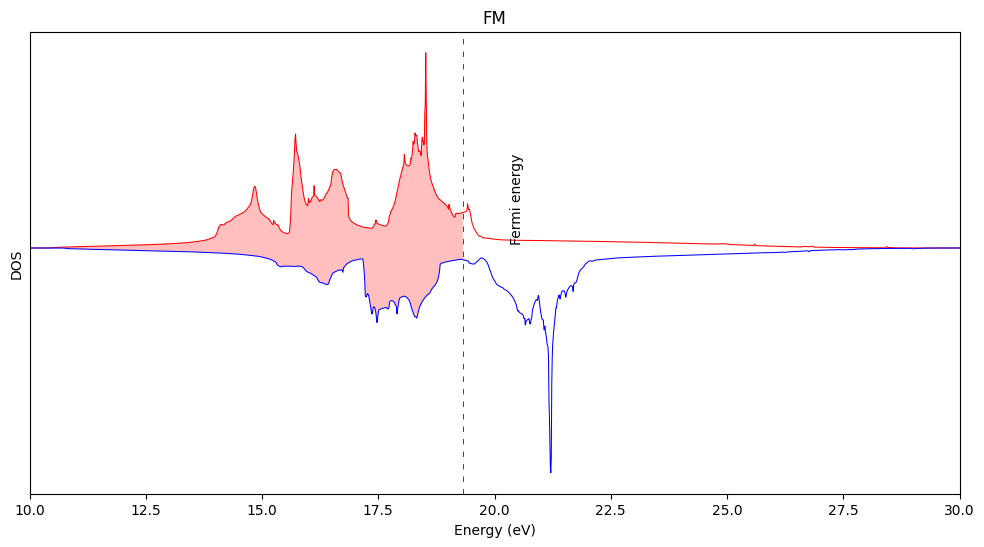

In [7]:
ground_state.occupations('tetrahedra')
ground_state.k_points(12)
ground_state.calculate('nscf')
ground_state.dos(emin=-20,emax=30)
ground_state.calculate('dos')
ground_state.plot('dos',xlim=[-20,30]) #plot dos